In [ ]:
!pip install matplotlib
!pip install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WildBunch_timestamps.csv")
df_ground_truth = pd.read_csv("wild_bunch_2.csv")

In [3]:
df

,sequence_id,start_frame,end_frame,start_time,end_time,duration
0,1,0,59,0.000 sec,0.984 sec,0.984 sec
1,2,59,887,0.984 sec,14.798 sec,13.814 sec
2,3,887,941,14.798 sec,15.699 sec,0.901 sec
3,4,941,3150,15.699 sec,52.553 sec,36.854 sec
4,5,3150,3285,52.553 sec,54.805 sec,2.252 sec
...,...,...,...,...,...,...
1852,1853,511790,512035,8538.372 sec,8542.459 sec,4.087 sec
1853,1854,512035,512145,8542.459 sec,8544.294 sec,1.835 sec
1854,1855,512145,512355,8544.294 sec,8547.798 sec,3.504 sec
1855,1856,512355,512452,8547.798 sec,8549.416 sec,1.618 sec


In [4]:
df_ground_truth["Start"] = pd.to_timedelta(df_ground_truth["Start"]).dt.seconds
df_ground_truth["End"] = pd.to_timedelta(df_ground_truth["End"]).dt.seconds

In [5]:
df_ground_truth

,Start,End,Action
0,0,14,NaN
1,14,26,NaN
2,26,35,NaN
3,35,39,NaN
4,39,41,NaN
...,...,...,...
143,580,583,NaN
144,583,588,NaN
145,588,595,NaN
146,595,597,NaN


In [6]:
df = df[:len(df_ground_truth)]

In [7]:
df["start_time"] = df["start_time"].apply(lambda x : x.replace("sec",""))
df["end_time"] = df["end_time"].apply(lambda x : x.replace("sec",""))

/var/folders/mn/dqtjsqvs3y9452_z544s_6880000gn/T/ipykernel_44322/1221012289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_time"] = df["start_time"].apply(lambda x : x.replace("sec",""))
/var/folders/mn/dqtjsqvs3y9452_z544s_6880000gn/T/ipykernel_44322/1221012289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["end_time"] = df["end_time"].apply(lambda x : x.replace("sec",""))


In [8]:
df["start_time"] = df["start_time"].astype('float64')
df["end_time"] = df["end_time"].astype('float64')

/var/folders/mn/dqtjsqvs3y9452_z544s_6880000gn/T/ipykernel_44322/3580096909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_time"] = df["start_time"].astype('float64')
/var/folders/mn/dqtjsqvs3y9452_z544s_6880000gn/T/ipykernel_44322/3580096909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["end_time"] = df["end_time"].astype('float64')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sequence_id  148 non-null    int64  
 1   start_frame  148 non-null    int64  
 2   end_frame    148 non-null    int64  
 3   start_time   148 non-null    float64
 4   end_time     148 non-null    float64
 5   duration     148 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 7.1+ KB


In [10]:
merged_df = pd.concat([df_ground_truth,df],axis=1)

In [11]:
merged_df

,Start,End,Action,sequence_id,start_frame,end_frame,start_time,end_time,duration
0,0,14,NaN,1,0,59,0.000,0.984,0.984 sec
1,14,26,NaN,2,59,887,0.984,14.798,13.814 sec
2,26,35,NaN,3,887,941,14.798,15.699,0.901 sec
3,35,39,NaN,4,941,3150,15.699,52.553,36.854 sec
4,39,41,NaN,5,3150,3285,52.553,54.805,2.252 sec
...,...,...,...,...,...,...,...,...,...
143,580,583,NaN,144,39357,39420,656.607,657.658,1.051 sec
144,583,588,NaN,145,39420,39462,657.658,658.358,0.701 sec
145,588,595,NaN,146,39462,39552,658.358,659.860,1.502 sec
146,595,597,NaN,147,39552,39595,659.860,660.577,0.717 sec


In [12]:
merged_df["Start Error"] = (merged_df["Start"] - merged_df["start_time"]).abs()
merged_df["End Error"] = (merged_df["End"] - merged_df["end_time"]).abs()

In [13]:
merged_df

,Start,End,Action,sequence_id,start_frame,end_frame,start_time,end_time,duration,Start Error,End Error
0,0,14,NaN,1,0,59,0.000,0.984,0.984 sec,0.000,13.016
1,14,26,NaN,2,59,887,0.984,14.798,13.814 sec,13.016,11.202
2,26,35,NaN,3,887,941,14.798,15.699,0.901 sec,11.202,19.301
3,35,39,NaN,4,941,3150,15.699,52.553,36.854 sec,19.301,13.553
4,39,41,NaN,5,3150,3285,52.553,54.805,2.252 sec,13.553,13.805
...,...,...,...,...,...,...,...,...,...,...,...
143,580,583,NaN,144,39357,39420,656.607,657.658,1.051 sec,76.607,74.658
144,583,588,NaN,145,39420,39462,657.658,658.358,0.701 sec,74.658,70.358
145,588,595,NaN,146,39462,39552,658.358,659.860,1.502 sec,70.358,64.860
146,595,597,NaN,147,39552,39595,659.860,660.577,0.717 sec,64.860,63.577


In [14]:
merged_df.describe()

,Start,End,sequence_id,start_frame,end_frame,start_time,end_time,Start Error,End Error
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,325.689189,329.695946,74.500000,25971.560811,26239.682432,433.292662,437.765831,108.191568,108.657980
std,169.727507,169.077314,42.868014,11562.663903,11415.471200,192.903964,190.448299,44.861533,44.163362
min,0.000000,14.000000,1.000000,0.000000,59.000000,0.000000,0.984000,0.000000,1.707000
25%,190.750000,196.000000,37.750000,18087.250000,18348.250000,301.755500,306.110000,96.666500,96.666500
50%,343.000000,347.000000,74.500000,28631.000000,28762.500000,477.661000,479.855000,117.414000,117.414000
75%,476.500000,478.750000,111.250000,36610.250000,36699.250000,610.781500,612.266500,134.117750,134.117750
max,597.000000,601.000000,148.000000,39595.000000,39682.000000,660.577000,662.029000,180.690000,180.690000


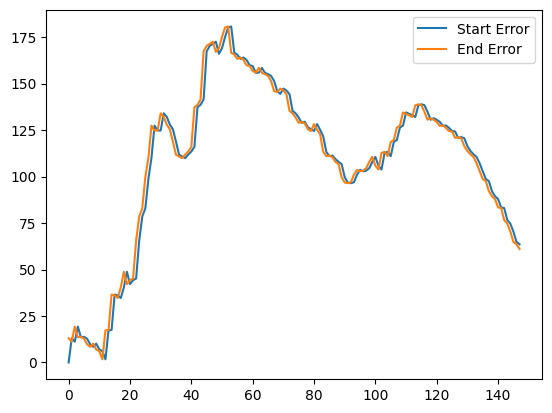

In [15]:
merged_df[["Start Error","End Error"]].plot(kind="line")
plt.savefig("analysis.png")

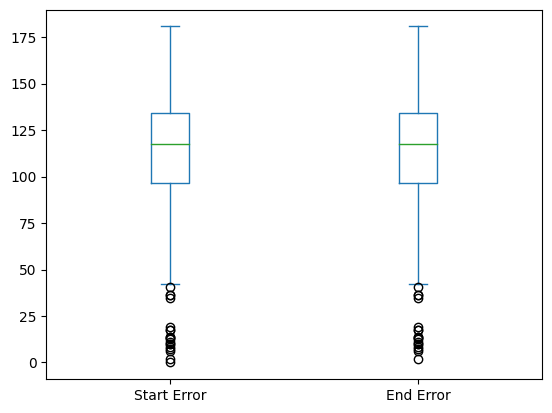

In [16]:
merged_df[["Start Error","End Error"]].plot(kind="box")
plt.savefig("analysis1.png")